In [39]:
import pandas as pd
import ujson
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import *
import csv
from tqdm import tqdm

In [40]:
with open('/shared/1/projects/cross-lingual-exchange/data/temp/relevant_users_with_centr.json', 'r') as f:
    users = ujson.load(f)
    
    #users with >= 10 tweets
    relevant_users = {}
    
    for user, user_data in users.items():
        if user_data['num_tweets'] >= 5:
            relevant_users[user] = user_data

In [41]:
with open('/home/sayghosh/cross-lingual-exchange/src/users_with_centrality_approx.tsv', 'r') as f:
    tsvin = csv.reader(f, delimiter='\t')
    for row in tqdm(tsvin):
            
        if row[0].strip() in relevant_users:
            relevant_users[row[0].strip()]['betw'] = float(row[1].strip())

4558740it [00:09, 466623.64it/s]


In [42]:
user_pr = {'user_id': [], 'lang': [], 'page_rank': [], 'eigen_cent': [], 'bilinguality': [], 'country': [], 'betw': []}
for user, user_data in relevant_users.items():
    if 'eigen_cent' in user_data and 'page_rank' in user_data:
        user_pr['user_id'].append(user)
        
        if user_data['bilinguality'] >= 0.99:
            user_pr['lang'].append('EN')
            
        elif user_data['bilinguality'] <= 0.01:
            user_pr['lang'].append('DE')
        else:
            user_pr['lang'].append('BI')
            
        user_pr['page_rank'].append(user_data['page_rank'])
        user_pr['eigen_cent'].append(user_data['eigen_cent'])
        user_pr['bilinguality'].append(user_data['bilinguality'])
        user_pr['country'].append(user_data['country'].rstrip())
        user_pr['betw'].append(user_data['betw'])


columns = ['user_id', 'lang', 'page_rank', 'eigen_cent', 'bilinguality', 'country', 'betw']
df = pd.DataFrame(user_pr, columns=columns)

In [43]:
def custom_type(bi):
    if bi == 0:
        return 'DE'
    elif bi < 0.25:
        return 'de<0.25'
    elif bi < 0.75:
        return '0.25<x<0.75'
    elif bi < 1:
        return 'en<1'
    else:
        return 'EN'
df['custom_label'] = df['bilinguality'].apply(custom_type)

In [44]:
df.head()

,user_id,lang,page_rank,eigen_cent,bilinguality,country,betw,custom_label
0,506,EN,2.705290e-07,1.273462e-06,1.0,United Kingdom,9.638317e-07,EN
1,569365942,EN,4.222658e-08,1.069441e-10,1.0,United Kingdom,0.000000e+00,EN
2,1328521350,EN,1.993815e-07,2.491222e-09,1.0,United Kingdom,0.000000e+00,EN
3,569365793,EN,2.874297e-07,5.513771e-08,1.0,United Kingdom,1.775821e-06,EN
4,791,EN,1.478844e-07,5.705692e-09,1.0,United Kingdom,4.593804e-09,EN


In [45]:
df.groupby(['country', 'custom_label']).count()

user_id     lang  page_rank  eigen_cent  \
country        custom_label                                            
Germany        0.25<x<0.75      6057     6057       6057        6057   
               DE               7128     7128       7128        7128   
               EN               5882     5882       5882        5882   
               de<0.25         17850    17850      17850       17850   
               en<1             3945     3945       3945        3945   
United Kingdom 0.25<x<0.75       772      772        772         772   
               DE                150      150        150         150   
               EN            1081142  1081142    1081142     1081142   
               de<0.25           413      413        413         413   
               en<1            56510    56510      56510       56510   

                             bilinguality     betw  
country        custom_label                         
Germany        0.25<x<0.75           6057     6057  
               DE                    7128     7128  
               EN                    5882     5882  
               de<0.25              17850    17850  
               en<1                  3945     3945  
United Kingdom 0.25<x<0.75            772      772  
               DE                     150      150  
               EN                 1081142  1081142  
               de<0.25                413      413  
               en<1                 56510    56510

In [46]:
df.set_index('user_id', inplace=True)
df.head()

,lang,page_rank,eigen_cent,bilinguality,country,betw,custom_label
user_id,,,,,,,
506,EN,2.705290e-07,1.273462e-06,1.0,United Kingdom,9.638317e-07,EN
569365942,EN,4.222658e-08,1.069441e-10,1.0,United Kingdom,0.000000e+00,EN
1328521350,EN,1.993815e-07,2.491222e-09,1.0,United Kingdom,0.000000e+00,EN
569365793,EN,2.874297e-07,5.513771e-08,1.0,United Kingdom,1.775821e-06,EN
791,EN,1.478844e-07,5.705692e-09,1.0,United Kingdom,4.593804e-09,EN


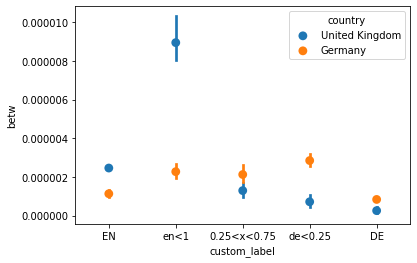

In [50]:
ax = sns.pointplot(x="custom_label", y="betw", data=df, join=False, hue='country', 
                   order=['EN', 'en<1', '0.25<x<0.75', 'de<0.25', 'DE'])

In [48]:
df.to_csv('/shared/1/projects/cross-lingual-exchange/data/dataframes/UK_DE.tsv', sep='\t')